In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
! pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


In [3]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
#from tensorflow.keras.layers.core import Flatten, Dense, Dropout
#from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
#from keras.optimizers import gradient_descent_v2
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD  # Assuming you want the stochastic gradient descent optimizer

import cv2, numpy as np

In [4]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
train_datagen_with_aug = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/DR-IMG_SET',
    target_size=(224, 224),
    batch_size=64,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/DR-IMG_SET', # same directory as training data
    target_size=(224, 224),
    batch_size=64,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 1984 images belonging to 5 classes.
Found 496 images belonging to 5 classes.


In [7]:
from keras.applications import MobileNetV3Large

MOBILENET = Sequential()

mobilenet_model = keras.applications.MobileNetV3Large(
    include_top=False, weights='imagenet',
    input_shape=(224,224,3), pooling='max', classes=5
)

In [ ]:
for layer in mobilenet_model.layers:
    layer.trainable = False

MOBILENET.add(mobilenet_model)
MOBILENET.add(Flatten())
MOBILENET.add(Dense(512,activation='relu'))
MOBILENET.add(Dense(5, activation='softmax'))

MOBILENET.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)

# sgd = gradient_descent_v2.SGD(learning_rate=0.001)
MOBILENET.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',precision_m, recall_m, f1_m])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
# DENSENET.fit(train_generator, validation_data=validation_generator, epochs=25, callbacks=callbacks_list, verbose=0)

graph=MOBILENET.fit(train_generator, epochs=50, validation_data = validation_generator, callbacks=callbacks_list, verbose=0)

MOBILENET.save("/content/drive/My Drive/DR-IMG_SET/model.h5")

#graph

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 960)               2996352   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 512)               492032    
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 3490949 (13.32 MB)
Trainable params: 494597 (1.89 MB)
Non-trainable params: 2996352 (11.43 MB)
_________________________________________________________________

Epoch 1: val_accuracy improved from -inf to 0.61895, saving model to weights

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.61895 to 0.75605, saving model to weights-improvement-02-0.76.hdf5

Epoch 3: val_accuracy improved from 0.75605 to 0.78831, saving model to weights-improvement-03-0.79.hdf5

Epoch 4: val_accuracy did not improve from 0.78831

Epoch 5: val_accuracy improved from 0.78831 to 0.80847, saving model to weights-improvement-05-0.81.hdf5

Epoch 6: val_accuracy did not improve from 0.80847

Epoch 7: val_accuracy did not improve from 0.80847

Epoch 8: val_accuracy did not improve from 0.80847

Epoch 9: val_accuracy did not improve from 0.80847

Epoch 10: val_accuracy did not improve from 0.80847

Epoch 11: val_accuracy did not improve from 0.80847

Epoch 12: val_accuracy did not improve from 0.80847

Epoch 13: val_accuracy did not improve from 0.80847

Epoch 14: val_accuracy did not improve from 0.80847

Epoch 15: val_accuracy did not improve from 0.80847

Epoch 16: val_accuracy did not improve from 0.80847

Epoch 17: val_accuracy did not improve from 0.8084

In [ ]:
from keras import models


In [ ]:
loaded_model=models.load_model(r'/content/drive/My Drive/data/model.h5')
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
Classes=["1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

1/1 [==============================] - 0s 36ms/step
[1]
Brown Spot


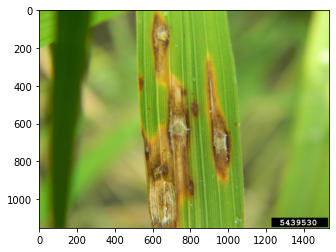

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
img_width=224
img_height=224
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img=cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

path= r"blast_3.jpg"
predict_x=loaded_model.predict(prepare(path))
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
disease=load_img(path)
x,y=10,10
# cv2.putText(disease, "Disease", (10, 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, 3, 2)
# cv2.imshow("prediction",disease)
plt.imshow(disease)
print (Classes[int(classes_x)])

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/Dataset/UCI_Rice/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

76450492

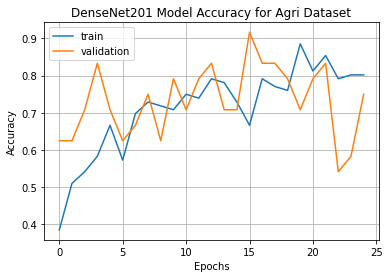

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Model Accuracy for Sign Language Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using DenseNet201 model is',max_acc*100)

The highest accuracy achieved using DenseNet201 model is 91.66666865348816
